In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from beakerx import *

### Import data

In [2]:
DATADIR = os.path.join(os.getenv("DATA_DIR"), 'processed_journey')
DATADIR

'/Volumes/GoogleDrive/Team Drives/GOV.UK teams/2018-2019/Q3/Knowledge up Q3/Data science/data/processed_journey'

In [3]:
DATADIR

'/Volumes/GoogleDrive/Team Drives/GOV.UK teams/2018-2019/Q3/Knowledge up Q3/Data science/data/processed_journey'

In [4]:
journeys1 = pd.read_csv(os.path.join(DATADIR, "dlo_prelim_meta_standard_with_pageseq_from_29-10_to_01-11-2018.csv.gz"), compression='gzip')

In [5]:
journeys1.shape

(3788851, 15)

In [6]:
journeys1.Occurrences.sort_values(ascending=False)

234819     166323
118099      58809
590725      52569
235634      37732
472617      26836
827246      18843
1180780     15292
353326      12505
582662      11791
945164      11488
353586      10616
1063097      9734
235979       8937
235920       8823
591052       8475
827143       8079
1054857      8027
944455       7760
1063055      7461
116189       6876
1180511      6807
354421       6802
118114       6791
354409       6712
1180388      6327
354618       6136
826721       6117
827294       6104
824424       6067
827283       5443
            ...  
2343166         1
2343165         1
2343164         1
2343187         1
2343188         1
2343189         1
2343202         1
2343212         1
2343211         1
2343210         1
2343209         1
2343208         1
2343207         1
2343206         1
2343205         1
2343204         1
2343203         1
2343201         1
2343190         1
2343200         1
2343199         1
2343198         1
2343197         1
2343196         1
2343195   

In [7]:
journeys1.head(10)

,Sequence,Occurrences,DeviceCategories,Dates,Page_Event_List,Page_List,PageSequence,Event_List,num_event_cats,Event_cats_agg,Event_cat_act_agg,Page_List_NL,Page_Seq_NL,Page_Seq_Occurrences,Occurrences_NL
0,/sure-start-maternity-grant/how-to-claim<<PAGE...,104,"[('mobile', 50), ('desktop', 50), ('tablet', 4)]","[('20181031', 34), ('20181029', 31), ('2018110...","[('/sure-start-maternity-grant/how-to-claim', ...","['/sure-start-maternity-grant/how-to-claim', '...",/sure-start-maternity-grant/how-to-claim>>/gov...,"[('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PA...",3,"[('PAGE_NULL', 2), ('External Link Clicked', 1...","[(('PAGE_NULL', 'PAGE_NULL'), 2), (('External ...","['/sure-start-maternity-grant/how-to-claim', '...",/sure-start-maternity-grant/how-to-claim>>/gov...,139,2552
1,/government/collections/data-protection-act-20...,120,"[('mobile', 13), ('desktop', 102), ('tablet', 5)]","[('20181031', 33), ('20181029', 39), ('2018110...",[('/government/collections/data-protection-act...,['/government/collections/data-protection-act-...,/government/collections/data-protection-act-20...,"[('PAGE_NULL', 'PAGE_NULL'), ('navDocumentColl...",3,"[('PAGE_NULL', 2), ('navDocumentCollectionLink...","[(('PAGE_NULL', 'PAGE_NULL'), 2), (('navDocume...",['/government/collections/data-protection-act-...,/government/collections/data-protection-act-20...,233,7763
2,/contact-the-dvla<<PAGE<:<NULL<:<NULL>>/contac...,92,"[('desktop', 26), ('mobile', 54), ('tablet', 12)]","[('20181031', 36), ('20181029', 29), ('2018110...","[('/contact-the-dvla', 'PAGE<:<NULL<:<NULL'), ...","['/contact-the-dvla', '/contact-the-dvla/y', '...",/contact-the-dvla>>/contact-the-dvla/y>>/conta...,"[('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PA...",3,"[('PAGE_NULL', 4), ('Simple Smart Answer', 1),...","[(('PAGE_NULL', 'PAGE_NULL'), 4), (('Simple Sm...","['/contact-the-dvla', '/contact-the-dvla/y', '...",/contact-the-dvla>>/contact-the-dvla/y>>/conta...,223,6398
3,/find-local-council<<PAGE<:<NULL<:<NULL>>/find...,105,"[('desktop', 91), ('mobile', 12), ('tablet', 2)]","[('20181031', 33), ('20181029', 26), ('2018110...","[('/find-local-council', 'PAGE<:<NULL<:<NULL')...","['/find-local-council', '/find-local-council/g...",/find-local-council>>/find-local-council/green...,"[('PAGE_NULL', 'PAGE_NULL'), ('postcodeSearch:...",2,"[('PAGE_NULL', 2), ('postcodeSearch:find_local...","[(('PAGE_NULL', 'PAGE_NULL'), 2), (('postcodeS...","['/find-local-council', '/find-local-council/g...",/find-local-council>>/find-local-council/green...,213,7049
4,/government/publications/civil-service-compete...,99,"[('mobile', 24), ('desktop', 66), ('tablet', 9)]","[('20181031', 34), ('20181029', 23), ('2018110...",[('/government/publications/civil-service-comp...,['/government/publications/civil-service-compe...,/government/publications/civil-service-compete...,"[('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PA...",2,"[('PAGE_NULL', 2), ('Download Link Clicked', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 2), (('Download ...",['/government/publications/civil-service-compe...,/government/publications/civil-service-compete...,896,46393
5,/personal-tax-account<<PAGE<:<NULL<:<NULL>>/pe...,386,"[('desktop', 185), ('mobile', 163), ('tablet',...","[('20181031', 137), ('20181029', 120), ('20181...","[('/personal-tax-account', 'PAGE<:<NULL<:<NULL...","['/personal-tax-account', '/personal-tax-accou...",/personal-tax-account>>/personal-tax-account/s...,"[('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PA...",2,"[('PAGE_NULL', 3), ('Radio button chosen', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 3), (('Radio but...","['/personal-tax-account', '/personal-tax-accou...",/personal-tax-account>>/personal-tax-account/s...,3879,1157083
6,/government/publications/application-to-transf...,474,"[('desktop', 289), ('tablet', 63), ('mobile', ...","[('20181031', 134), ('20181029', 151), ('20181...",[('/government/publications/application-to-tra...,['/government/publications/application-to-tran...,/government/publications/application-to-transf...,"[('

### Sample data for speed

In [8]:
journeys = journeys1.sample(frac=0.01, random_state=1234, weights=journeys1.Occurrences).copy()

In [9]:
journeys.shape

(37889, 15)

In [10]:
journeys.Occurrences.sort_values(ascending=False)

234819     166323
118099      58809
590725      52569
235634      37732
472617      26836
827246      18843
1180780     15292
353326      12505
582662      11791
945164      11488
353586      10616
1063097      9734
235979       8937
235920       8823
591052       8475
827143       8079
1054857      8027
944455       7760
1063055      7461
116189       6876
1180511      6807
354421       6802
118114       6791
354409       6712
1180388      6327
354618       6136
826721       6117
827294       6104
824424       6067
827283       5443
            ...  
3162419         1
552191          1
644031          1
2076841         1
1520308         1
2281036         1
477986          1
2244199         1
599766          1
2331288         1
3428950         1
2363705         1
2401876         1
2763449         1
1762023         1
636092          1
1522673         1
1976113         1
3675750         1
315492          1
510345          1
3421285         1
1028143         1
1523959         1
2683443   

### derive variables (create features...)

In [11]:
journeys['page_list_eval'] = journeys['Page_List'].map(pd.eval)
journeys['page_seq_len'] = journeys['page_list_eval'].map(len)

In [12]:
journeys['page_list_NL_eval'] = journeys['Page_List_NL'].map(pd.eval)
journeys['page_seq_len_NL'] = journeys['page_list_NL_eval'].map(len)

In [13]:
# def contains_search(Page_List):
#     search_in_sequence = 0
#     thelist  = pd.eval(Page_List)
    
#     for page in thelist:
#         if ('/search?' in page) or ('/search/' in page):
#             search_in_sequence = 1
            
#     return search_in_sequence

# def count_search(Page_List):
#     times_search_in_sequence = 0
#     thelist  = pd.eval(Page_List)
    
#     for page in thelist:
#         if ('/search?' in page) or ('/search/' in page):
#             times_search_in_sequence += 1
#     return times_search_in_sequence


# # journeys['contains_search'] = list(map(contains_search, journeys['Page_List']))

# journeys['count_search'] = list(map(count_search, journeys['Page_List']))

In [14]:
journeys['count_search'] = journeys.PageSequence.str.count("/search?")+journeys.PageSequence.str.count("/search/")

In [15]:
journeys['event_list_contains_start'] = np.where(journeys.Event_List.str.contains("start"), 1, 0)
journeys['page_seq_contains_start'] = np.where(journeys.Sequence.str.contains("start"), 1, 0)
journeys['page_seq_contains_service.gov.uk'] = np.where(journeys.Sequence.str.contains("service.gov.uk"), 1, 0)

In [16]:
journeys['contains_search_regex'] = np.where((journeys.PageSequence.str.contains("/search?")) | (journeys.PageSequence.str.contains("/search/")), 1, 0)

Get differnet results when using the contains_search function iterating over pagelist to the regex function in PageSequence. It would be good to understand why. 

In [17]:
journeys['contains_search_n'] = journeys['contains_search_regex']*journeys['Page_Seq_Occurrences']

In [18]:
def get_end_page(Page_List):          
    return pd.eval(Page_List)[-1]

journeys['final_page'] = journeys['Page_List'].map(get_end_page)

In [19]:
def count_desktop(DeviceCategories): 
    thelist  = pd.eval(DeviceCategories)
    desktop = 0
    mobile = 0
    other = 0
    for i in range(len(thelist)):
        if thelist[i][0] =='desktop':
            desktop = thelist[i][1]
        elif thelist[i][0] =='mobile':
            mobile = thelist[i][1]
        else:
            other = thelist[i][1]      
    return desktop, mobile, other

### Device used

In [20]:
journeys['desktop'], journeys['mobile'], journeys['other_device'] = zip(*journeys['DeviceCategories'].map(count_desktop))

In [21]:
journeys['more_desktop'] = np.where(journeys['desktop'] > (journeys['mobile']+journeys['other_device']), 1, 0)

more_desktop
0    17735
1    20154
dtype: int64


<Figure size 2160x2160 with 0 Axes>

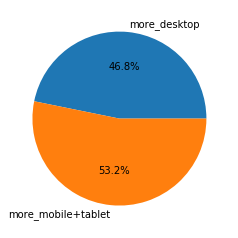

<Figure size 2160x2160 with 0 Axes>

In [22]:
print(journeys.groupby('more_desktop').size())
plt.pie(journeys.groupby('more_desktop').size(), labels=['more_desktop', 'more_mobile+tablet'], autopct='%1.1f%%')
plt.figure(figsize=(30,30))

### journey length - Don't forget this data is only in journeys of more than 1 page
### Think need to combine with klo for this. Also see what Matt's done already

EEK, be careful of frequency counts because need to include Occurences column for this. This is harder to interpret than it looks

In [23]:
journeys['page_seq_len'].describe()

count    37889.000000
mean         5.468236
std          6.419098
min          2.000000
25%          2.000000
50%          4.000000
75%          6.000000
max        253.000000
Name: page_seq_len, dtype: float64

### Make a long df a row for each session

In [24]:
#make a smaller copy of data with only 2 cols ready to make it really looooong
slim = journeys[['Occurrences','final_page','page_seq_len', 'page_seq_len_NL', 'event_list_contains_start', 'count_search', 'contains_search_regex', 'page_list_NL_eval', 'Page_Seq_NL', 'page_seq_contains_start', 'page_seq_contains_service.gov.uk']].copy()
#repeat rows for each occurrence
journey_expanded =  slim.loc[slim.index.repeat(slim['Occurrences'])].copy()


In [25]:
journey_expanded['page_seq_len'].describe()

count    1.636206e+06
mean     2.438283e+00
std      1.593644e+00
min      2.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.530000e+02
Name: page_seq_len, dtype: float64

In [26]:
journey_expanded['page_seq_len_NL'].describe()

count    1.636206e+06
mean     2.166327e+00
std      1.581588e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.120000e+02
Name: page_seq_len_NL, dtype: float64

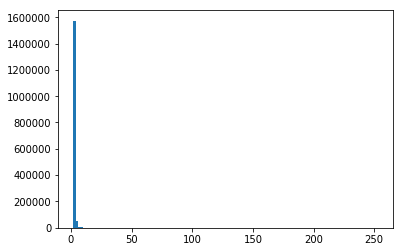

In [27]:
journey_expanded['page_seq_len'].hist(bins=122, grid=False)

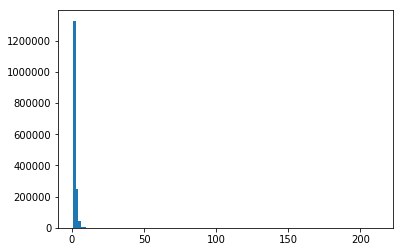

In [28]:
journey_expanded['page_seq_len_NL'].hist(bins=122, grid=False)

### Search counts

In [29]:
print("{}/{} ({}%) of journeys contain internal search in their path".format(journeys['contains_search_n'].sum(),
                                                                             journeys['Page_Seq_Occurrences'].sum(),
                                                                             journeys['contains_search_n'].sum()/journeys['Page_Seq_Occurrences'].sum()*100))

521969/35495218 (1.4705332983164099%) of journeys contain internal search in their path


In [30]:
data = []
for i in range(journeys['page_seq_len'].max()):
    df = journeys[journeys['page_seq_len']==i]
    if df['Page_Seq_Occurrences'].sum()>1:
            percent = round(df['contains_search_n'].sum()/df['Page_Seq_Occurrences'].sum()*100, 1)
            n = df['contains_search_n'].sum()
            denom = df['Page_Seq_Occurrences'].sum()
            p = percent/100
            variance = (p*(1-p))/denom
            data.append([i+1, n, denom, percent, variance])

search_seqlength = pd.DataFrame(data, columns=['length', 'n', 'denom','percent', 'variance'])

In [31]:
search_seqlength.iloc[10:27]

,length,n,denom,percent,variance
10,13,100,707,14.1,0.000171
11,14,85,540,15.7,0.000245
12,15,87,364,23.9,0.000500
13,16,65,281,23.1,0.000632
14,17,45,233,19.3,0.000668
15,18,43,202,21.3,0.000830
16,19,39,191,20.4,0.000850
17,20,30,136,22.1,0.001266
18,21,34,110,30.9,0.001941
19,22,30,110,27.3,0.001804


In [32]:
search_seqlength['length'].describe()

count     65.000000
mean      37.138462
std       24.095433
min        3.000000
25%       19.000000
50%       35.000000
75%       51.000000
max      126.000000
Name: length, dtype: float64

Text(0, 0.5, 'Percent of journeys used internal search')

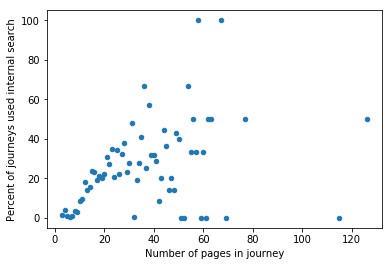

In [33]:
ax = search_seqlength.plot.scatter(x='length', y='percent')
ax.set_xlabel("Number of pages in journey")
ax.set_ylabel("Percent of journeys used internal search")

(0, 312)

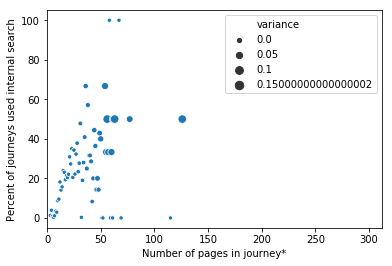

In [34]:
ax = sns.scatterplot(x="length", y="percent", size="variance", data=search_seqlength)
ax.set_xlabel("Number of pages in journey*")
ax.set_ylabel("Percent of journeys used internal search")
ax.set_xlim(0, 312)

In [35]:
longerthan3 = journeys[journeys['page_seq_len']>3]

print("{}/{} ({}%) of longerthan3 contain internal search in their path".format(longerthan3['contains_search_n'].sum(),
                                                                             longerthan3['Page_Seq_Occurrences'].sum(),
                                                                             longerthan3['contains_search_n'].sum()/longerthan3['Page_Seq_Occurrences'].sum()*100))

13723/1854813 (0.7398589507405868%) of longerthan3 contain internal search in their path


In [36]:
journeys[journeys['contains_search_regex']==1].page_seq_len.describe()

count    4062.000000
mean        8.428114
std         8.971438
min         2.000000
25%         4.000000
50%         6.000000
75%        10.000000
max       173.000000
Name: page_seq_len, dtype: float64

In [37]:
journeys.page_seq_len.describe()

count    37889.000000
mean         5.468236
std          6.419098
min          2.000000
25%          2.000000
50%          4.000000
75%          6.000000
max        253.000000
Name: page_seq_len, dtype: float64

In [38]:
journeys['count_search'].describe()

count    37889.000000
mean         0.215313
std          0.939686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         45.000000
Name: count_search, dtype: float64

In [39]:
journeys[journeys['contains_search_regex']==1].count_search.describe()

count    4062.00000
mean        2.00837
std         2.15319
min         1.00000
25%         1.00000
50%         1.00000
75%         2.00000
max        45.00000
Name: count_search, dtype: float64

Text(0, 0.5, 'Number of journeys')

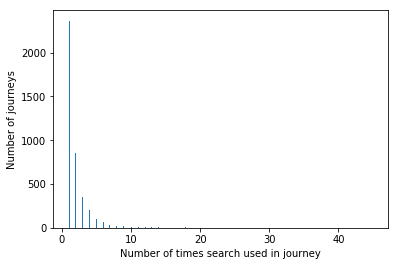

In [40]:
ax = journeys[journeys['contains_search_regex']==1].count_search.hist(bins=300, grid=False)
ax.set_xlabel("Number of times search used in journey")
ax.set_ylabel("Number of journeys")

(0, 10)

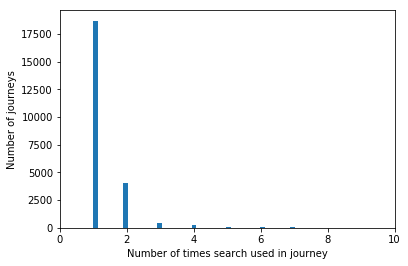

In [41]:
ax = journey_expanded[journey_expanded['contains_search_regex']==1].count_search.hist(bins=300, grid=False)
ax.set_xlabel("Number of times search used in journey")
ax.set_ylabel("Number of journeys")
ax.set_xlim(0, 10)

(0, 10)

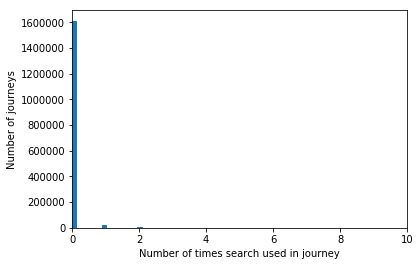

In [42]:
ax = journey_expanded.count_search.hist(bins=300, grid=False)
ax.set_xlabel("Number of times search used in journey")
ax.set_ylabel("Number of journeys")
ax.set_xlim(0, 10)

(0, 312)

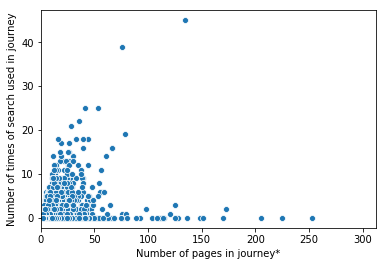

In [43]:
ax = sns.scatterplot(x="page_seq_len", y="count_search", data=journey_expanded)
ax.set_xlabel("Number of pages in journey*")
ax.set_ylabel("Number of times of search used in journey")
ax.set_xlim(0, 312)

In [44]:
# f, ax = plt.subplots(figsize=(6, 6))
# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
# sns.kdeplot(journey_expanded.page_seq_len, journey_expanded.count_search, cmap=cmap, n_levels=1000, shade=True)
# ax.set_xlim(0, 100)
# ax.set_ylim(0, 10)

In [45]:
# f, ax = plt.subplots(figsize=(6, 6))
# sns.kdeplot(journey_expanded.page_seq_len, journey_expanded.count_search, ax=ax)
# sns.rugplot(journey_expanded.page_seq_len, color="g", ax=ax)
# sns.rugplot(journey_expanded.count_search, vertical=True, ax=ax)


In [46]:
# with sns.axes_style("white"):
#     sns.jointplot(x=journey_expanded.page_seq_len, y=journey_expanded.count_search, kind="hex", color="k")

In [47]:
longerthan10 = journey_expanded[journey_expanded['page_seq_len']>10]

(0, 100)

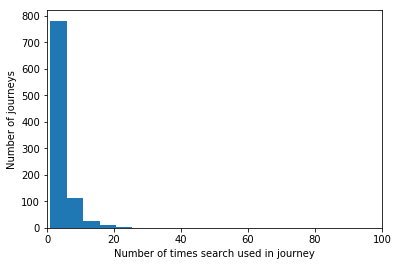

In [48]:
ax = longerthan10[longerthan10['contains_search_regex']==1].count_search.hist(bins=9, grid=False)
ax.set_xlabel("Number of times search used in journey")
ax.set_ylabel("Number of journeys")
ax.set_xlim(0, 100)

In [49]:
longerthan10[longerthan10['contains_search_regex']==1].count_search.describe()

count    937.000000
mean       3.408751
std        3.746572
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max       45.000000
Name: count_search, dtype: float64

In [50]:
longerthan10[longerthan10['contains_search_regex']==1].shape

(937, 11)

In [51]:
longerthan10.shape

(5596, 11)

### Most frequent pages

In [52]:
# lst_col = 'Page_Seq_NL'

# r = pd.DataFrame({
#       col:np.repeat(journey_expanded[col].values, journey_expanded[lst_col].str.len())
#       for col in journey_expanded.columns.drop(lst_col)}
#     ).assign(**{lst_col:np.concatenate(journey_expanded[lst_col].values)})[journey_expanded.columns]

In [53]:
journey_expanded['journey_type'] = journey_expanded.index

In [54]:
journey_expanded.reset_index(inplace=True)
journey_expanded['journey'] = journey_expanded.index

In [55]:
journey_expanded.head()

,index,Occurrences,final_page,page_seq_len,page_seq_len_NL,event_list_contains_start,count_search,contains_search_regex,page_list_NL_eval,Page_Seq_NL,page_seq_contains_start,page_seq_contains_service.gov.uk,journey_type,journey
0,354599,2272,/vehicle-tax,2,2,0,0,0,"[/check-vehicle-tax, /vehicle-tax]",/check-vehicle-tax>>/vehicle-tax,0,1,354599,0
1,354599,2272,/vehicle-tax,2,2,0,0,0,"[/check-vehicle-tax, /vehicle-tax]",/check-vehicle-tax>>/vehicle-tax,0,1,354599,1
2,354599,2272,/vehicle-tax,2,2,0,0,0,"[/check-vehicle-tax, /vehicle-tax]",/check-vehicle-tax>>/vehicle-tax,0,1,354599,2
3,354599,2272,/vehicle-tax,2,2,0,0,0,"[/check-vehicle-tax, /vehicle-tax]",/check-vehicle-tax>>/vehicle-tax,0,1,354599,3
4,354599,2272,/vehicle-tax,2,2,0,0,0,"[/check-vehicle-tax, /vehicle-tax]",/check-vehicle-tax>>/vehicle-tax,0,1,354599,4


In [56]:
#this gives me a new row for every page in the no loop page list in the data which already has a row for every occurrence
#so now each row represents a single occurrence of that page within a journey

s = journey_expanded.apply(lambda x: pd.Series(x['page_list_NL_eval']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'page'
page_expanded = journey_expanded.join(s).copy()

In [57]:
page_expanded.head()

,index,Occurrences,final_page,page_seq_len,page_seq_len_NL,event_list_contains_start,count_search,contains_search_regex,page_list_NL_eval,Page_Seq_NL,page_seq_contains_start,page_seq_contains_service.gov.uk,journey_type,journey,page
0,354599,2272,/vehicle-tax,2,2,0,0,0,"[/check-vehicle-tax, /vehicle-tax]",/check-vehicle-tax>>/vehicle-tax,0,1,354599,0,/check-vehicle-tax
0,354599,2272,/vehicle-tax,2,2,0,0,0,"[/check-vehicle-tax, /vehicle-tax]",/check-vehicle-tax>>/vehicle-tax,0,1,354599,0,/vehicle-tax
1,354599,2272,/vehicle-tax,2,2,0,0,0,"[/check-vehicle-tax, /vehicle-tax]",/check-vehicle-tax>>/vehicle-tax,0,1,354599,1,/check-vehicle-tax
1,354599,2272,/vehicle-tax,2,2,0,0,0,"[/check-vehicle-tax, /vehicle-tax]",/check-vehicle-tax>>/vehicle-tax,0,1,354599,1,/vehicle-tax
2,354599,2272,/vehicle-tax,2,2,0,0,0,"[/check-vehicle-tax, /vehicle-tax]",/check-vehicle-tax>>/vehicle-tax,0,1,354599,2,/check-vehicle-tax


In [58]:
print("Total journeys = {} \nTotal NL journey types = {} \nMean number of journeys per journey type = {}".format(
    journey_expanded.shape[0],
    journey_expanded.Page_Seq_NL.nunique(),
    journey_expanded.shape[0]/journey_expanded.Page_Seq_NL.nunique()))

Total journeys = 1636206 
Total NL journey types = 31304 
Mean number of journeys per journey type = 52.26827242524917


In [59]:
print("Total journey made with loops = {} \nTotal journey types = {} \nTotal journey types without loops = {} \nTotal pages visited = {}".format(
    page_expanded.journey.nunique(),
    page_expanded.journey_type.nunique(),
    page_expanded.Page_Seq_NL.nunique(),
    page_expanded.shape[0]))

Total journey made with loops = 1636206 
Total journey types = 37889 
Total journey types without loops = 31304 
Total pages visited = 3544557


In [60]:
total_page_visits = page_expanded.shape[0]

In [61]:
page_expanded.groupby(['journey_type', 'journey']).size().describe()

count    1.636206e+06
mean     2.166327e+00
std      1.581588e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.120000e+02
dtype: float64

In [62]:
page_expanded.groupby([ 'journey']).size().describe()

count    1.636206e+06
mean     2.166327e+00
std      1.581588e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.000000e+00
max      2.120000e+02
dtype: float64

Oh good, this is distribution of number of pages per journey and now matches journey_expanded['page_seq_len_NL'].describe()

In [63]:
# So I don't want to have more than one row for a page if it appeared twice in a session.
# I think that's because we might expect pages to be viewed multiple times in a session for both the do-a-thing and chang-a-thing journeys
# So I'm going to drop duplicate rows for a page within the same journey

page_expanded_no_repeats = page_expanded.drop_duplicates(['journey', 'page']).copy()

In [64]:
print("Total journey made with loops = {} \nTotal journey types = {} \nTotal journey types without loops = {} \nUnique pages visited = {}".format(
    page_expanded_no_repeats.journey.nunique(),
    page_expanded_no_repeats.journey_type.nunique(),
    page_expanded_no_repeats.Page_Seq_NL.nunique(),
    page_expanded_no_repeats.shape[0]))

Total journey made with loops = 1636206 
Total journey types = 37889 
Total journey types without loops = 31304 
Unique pages visited = 3401917


In [65]:
print("So there were {} pages that were visited at least once in a journey and won't be counted from now".format(
page_expanded.shape[0]-page_expanded_no_repeats.shape[0]))

So there were 142640 pages that were visited at least once in a journey and won't be counted from now


In [66]:
print("The mean number of visits to a single page in a journey ={}".format(
    total_page_visits/page_expanded_no_repeats.shape[0]))

The mean number of visits to a single page in a journey =1.041929300450305


In [67]:
page_expanded.groupby(['journey', 'page']).size().describe()

count    3.401917e+06
mean     1.041929e+00
std      2.553281e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+02
dtype: float64

Most journeys (>=75%) (without loops) only visit a page once. The average is 1.25 because a small number of jounreys visit a page many times

In [68]:
page_expanded_no_repeats.groupby([ 'page']).size().describe()

count     33310.000000
mean        102.129000
std        2772.645187
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max      264766.000000
dtype: float64

In [69]:
page_expanded_no_repeats.groupby([ 'page']).size().sort_values(ascending=False).head(20)

page
/government/organisations/companies-house                        264766
/get-information-about-a-company                                 247400
/sign-in-universal-credit                                        172154
/                                                                119620
/vehicle-tax                                                     119439
/log-in-register-hmrc-online-services                            107427
/government/organisations/hm-revenue-customs                      93662
/universal-credit                                                 84957
/check-vehicle-tax                                                77336
/contact/govuk/anonymous-feedback/thankyou                        76555
/done/vehicle-tax                                                 71969
/sold-bought-vehicle                                              43563
/sold-bought-vehicle/y                                            43314
/view-driving-licence                                      

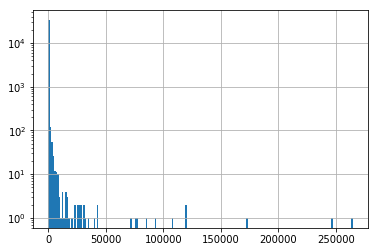

In [70]:
ax = page_expanded_no_repeats.groupby([ 'page']).size().hist(bins=200)
ax.set_yscale('log')

This is the distribution of number of journeys containing a page. Some pages are in lots of journeys (10000) and half of pages are only in one. The mean number of jounreys a page is in is 5.6. 

Theres a 2% of content in 80% of sessionz thing that defines mainstream for some people. Is it true?

In [71]:
print("There are {} different pages".format(
    page_expanded_no_repeats.groupby([ 'page']).size().sort_values(ascending=False).shape[0]))

unique_pages = page_expanded_no_repeats.groupby([ 'page']).size().sort_values(ascending=False).shape[0]

There are 33310 different pages


In [72]:
top_2_percent = page_expanded_no_repeats.groupby([ 'page']).size().nlargest(int(unique_pages * 0.02))

In [73]:
print("the top 2% of pages are visited in {}% of journeys".format(
    top_2_percent.sum()/page_expanded_no_repeats.groupby([ 'page']).size().sum()))

the top 2% of pages are visited in 0.9282716186197371% of journeys


In [74]:
percent = 0.13

print("the top {}% of pages are visited in {}% of journeys".format(
    percent * 100,
    page_expanded_no_repeats.groupby([ 'page']).size().nlargest(int(unique_pages * percent)).sum()/page_expanded_no_repeats.groupby([ 'page']).size().sum()))

the top 13.0% of pages are visited in 0.9870658220056515% of journeys


In [75]:
data = []
for i in np.arange(0.0, 1.0, 0.001):
    percent_of_pages = i*100
    n = page_expanded_no_repeats.groupby([ 'page']).size().nlargest(int(unique_pages * i)).sum()
    percent_of_journeys = n/page_expanded_no_repeats.groupby([ 'page']).size().sum()*100
    data.append([percent_of_pages, n, percent_of_journeys])

journey_to_content_relationship = pd.DataFrame(data, columns=['percent_of_pages', 'number_of_pages', 'percent_of_journeys'])

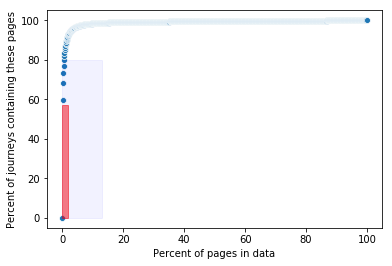

In [76]:
ax = sns.scatterplot(x="percent_of_pages", y="percent_of_journeys", data=journey_to_content_relationship)
ax.set_xlabel("Percent of pages in data")
ax.set_ylabel("Percent of journeys containing these pages")

# Create a Rectangle patch
rect = patches.Rectangle((0,0),2,57,linewidth=1,edgecolor='r',facecolor='red', fill=True, alpha=0.5)
rect2 = patches.Rectangle((0,0),13,80,linewidth=1,edgecolor='blue',facecolor='blue', fill=True, alpha=0.05)
# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect2)

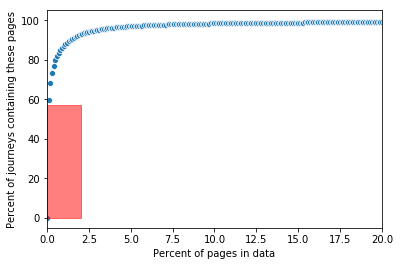

In [77]:


ax = sns.scatterplot(x="percent_of_pages", y="percent_of_journeys", data=journey_to_content_relationship)
ax.set_xlabel("Percent of pages in data")
ax.set_ylabel("Percent of journeys containing these pages")
ax.set_xlim(0, 20)

# Create a Rectangle patch
rect = patches.Rectangle((0,0),2,57,linewidth=1,edgecolor='r',facecolor='red', fill=True, alpha=0.5)

# Add the patch to the Axes
ax.add_patch(rect)

### journeys containing start pages

In [78]:
journey_expanded.event_list_contains_start.value_counts()

0    1625086
1      11120
Name: event_list_contains_start, dtype: int64

In [79]:
journey_expanded.event_list_contains_start.value_counts(normalize=True)

0    0.993204
1    0.006796
Name: event_list_contains_start, dtype: float64

In [80]:
journey_expanded.page_seq_contains_start.value_counts()

0    1622256
1      13950
Name: page_seq_contains_start, dtype: int64

In [81]:
journey_expanded.page_seq_contains_start.value_counts(normalize=True)

0    0.991474
1    0.008526
Name: page_seq_contains_start, dtype: float64

<Figure size 2160x2160 with 0 Axes>

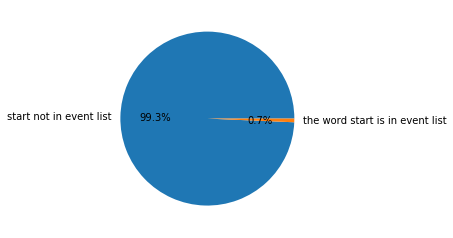

<Figure size 2160x2160 with 0 Axes>

In [82]:

plt.pie(journey_expanded.event_list_contains_start.value_counts(), labels=['start not in event list', 'the word start is in event list'], autopct='%1.1f%%')
plt.figure(figsize=(30,30))

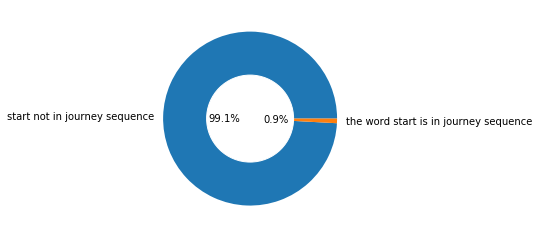

In [114]:

plt.pie(journey_expanded.page_seq_contains_start.value_counts(), labels=['start not in journey sequence', 'the word start is in journey sequence'], autopct='%1.1f%%', pctdistance=0.3)

# add a circle at the center
my_circle=plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


<Figure size 2160x2160 with 0 Axes>

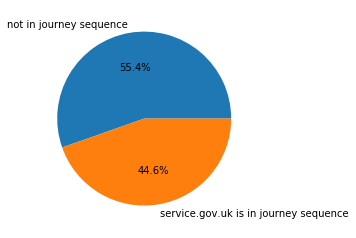

<Figure size 2160x2160 with 0 Axes>

In [84]:

plt.pie(journey_expanded['page_seq_contains_service.gov.uk'].value_counts(), labels=['not in journey sequence', 'service.gov.uk is in journey sequence'], autopct='%1.1f%%')
plt.figure(figsize=(30,30))

### End page

In [85]:
def get_end_page(Page_List):          
    return pd.eval(Page_List)[-1]

journeys['final_page'] = journeys['Page_List'].map(get_end_page)

In [86]:
journeys['final_page'].nunique()

11592

In [87]:
journeys.shape

(37889, 30)

#### most frequent end pages

In [88]:
journey_expanded.groupby('final_page').size().describe()

count     11592.000000
mean        141.149586
std        3220.340639
min           1.000000
25%           1.000000
50%           1.000000
75%           6.000000
max      241552.000000
dtype: float64

In [89]:
journey_expanded.groupby('final_page').size().sort_values(ascending=False).iloc[0:50]

final_page
/get-information-about-a-company                                                                                      241552
/sign-in-universal-credit                                                                                             166836
/log-in-register-hmrc-online-services                                                                                 103099
/vehicle-tax                                                                                                           79091
/check-vehicle-tax                                                                                                     69439
/contact/govuk/anonymous-feedback/thankyou                                                                             61106
/                                                                                                                      41382
/view-driving-licence                                                                                             

#### Most number of 'ways' of getting there

In [90]:
print("On average there are {} journeys per exit page; ways of getting there".format(journeys.shape[0]/journeys['final_page'].nunique()))

On average there are 3.2685472739820565 journeys per exit page; ways of getting there


In [91]:
unique_page_sequences = journeys.drop_duplicates('Page_Seq_NL')

In [92]:
unique_page_sequences.groupby('final_page').size().describe()

count    11592.000000
mean         2.700483
std          9.474749
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        418.000000
dtype: float64

In [93]:
pd.set_option('display.max_colwidth', -1)
unique_page_sequences[unique_page_sequences['final_page']=='/vehicle-tax'].head()

,Sequence,Occurrences,DeviceCategories,Dates,Page_Event_List,Page_List,PageSequence,Event_List,num_event_cats,Event_cats_agg,...,event_list_contains_start,page_seq_contains_start,page_seq_contains_service.gov.uk,contains_search_regex,contains_search_n,final_page,desktop,mobile,other_device,more_desktop
354599,/check-vehicle-tax<<PAGE<:<NULL<:<NULL>>/check-vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicleenquiry.service.gov.uk>>/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk,2272,"[('mobile', 1589), ('desktop', 547), ('tablet', 136)]","[('20181031', 725), ('20181029', 486), ('20181102', 710), ('20181104', 351)]","[('/check-vehicle-tax', 'PAGE<:<NULL<:<NULL'), ('/check-vehicle-tax', 'EVENT<:<External Link Clicked<:<https://www.vehicleenquiry.service.gov.uk'), ('/vehicle-tax', 'PAGE<:<NULL<:<NULL'), ('/vehicle-tax', 'EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk')]","['/check-vehicle-tax', '/vehicle-tax']",/check-vehicle-tax>>/vehicle-tax,"[('PAGE_NULL', 'PAGE_NULL'), ('External Link Clicked', 'https://www.vehicleenquiry.service.gov.uk'), ('PAGE_NULL', 'PAGE_NULL'), ('External Link Clicked', 'https://www.vehicletax.service.gov.uk')]",2,"[('PAGE_NULL', 2), ('External Link Clicked', 2)]",...,0,0,1,0,0,/vehicle-tax,547,1589,136,0
709092,/sold-bought-vehicle<<PAGE<:<NULL<:<NULL>>/sold-bought-vehicle/y<<PAGE<:<NULL<:<NULL>>/sold-bought-vehicle/y/yes<<PAGE<:<NULL<:<NULL>>/sold-bought-vehicle/y/yes/sold-a-vehicle-out-of-the-trade<<PAGE<:<NULL<:<NULL>>/sold-bought-vehicle/y/yes/sold-a-vehicle-out-of-the-trade<<EVENT<:<Simple Smart Answer<:<Completed>>/sold-bought-vehicle/y/yes/sold-a-vehicle-out-of-the-trade<<EVENT<:<External Link Clicked<:<https://www.buysellvehicle.service.gov.uk/buy-motor-trade/setup-trade-details>>/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk,444,"[('desktop', 424), ('tablet', 12), ('mobile', 8)]","[('20181031', 188), ('20181029', 109), ('20181102', 122), ('20181104', 25)]","[('/sold-bought-vehicle', 'PAGE<:<NULL<:<NULL'), ('/sold-bought-vehicle/y', 'PAGE<:<NULL<:<NULL'), ('/sold-bought-vehicle/y/yes', 'PAGE<:<NULL<:<NULL'), ('/sold-bought-vehicle/y/yes/sold-a-vehicle-out-of-the-trade', 'PAGE<:<NULL<:<NULL'), ('/sold-bought-vehicle/y/yes/sold-a-vehicle-out-of-the-trade', 'EVENT<:<Simple Smart Answer<:<Completed'), ('/sold-bought-vehicle/y/yes/sold-a-vehicle-out-of-the-trade', 'EVENT<:<External Link Clicked<:<https://www.buysellvehicle.service.gov.uk/buy-motor-trade/setup-trade-details'), ('/vehicle-tax', 'PAGE<:<NULL<:<NULL'), ('/vehicle-tax', 'EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk')]","['/sold-bought-vehicle', '/sold-bought-vehicle/y', '/sold-bought-vehicle/y/yes', '/sold-bought-vehicle/y/yes/sold-a-vehicle-out-of-the-trade', '/vehicle-tax']",/sold-bought-vehicle>>/sold-bought-vehicle/y>>/sold-bought-vehicle/y/yes>>/sold-bought-vehicle/y/yes/sold-a-vehicle-out-of-the-trade>>/vehicle-tax,"[('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PAGE_NULL'), ('PAGE_NULL', 'PAGE_NULL'), ('Simple Smart Answer', 'Completed'), ('External Link Clicked', 'https://www.buysellvehicle.service.gov.uk/buy-motor-trade/setup-trade-details'), ('PAGE_NULL', 'PAGE_NULL'), ('External Link Clicked', 'https://www.vehicletax.service.gov.uk')]",3,"[('PAGE_NULL', 5), ('Simple Smart Answer', 1), ('External Link Clicked', 2)]",...,0,0,1,0,0,/vehicle-tax,424,8,12,1
943923,/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk>>/vehicle-tax<<PAGE<:<NULL<:<NULL>>/vehicle-tax<<EVENT<:<External Link Clicked<:<https://www.vehicletax.service.gov.uk,96,"[('desktop', 16), ('mobile', 67), ('tablet',

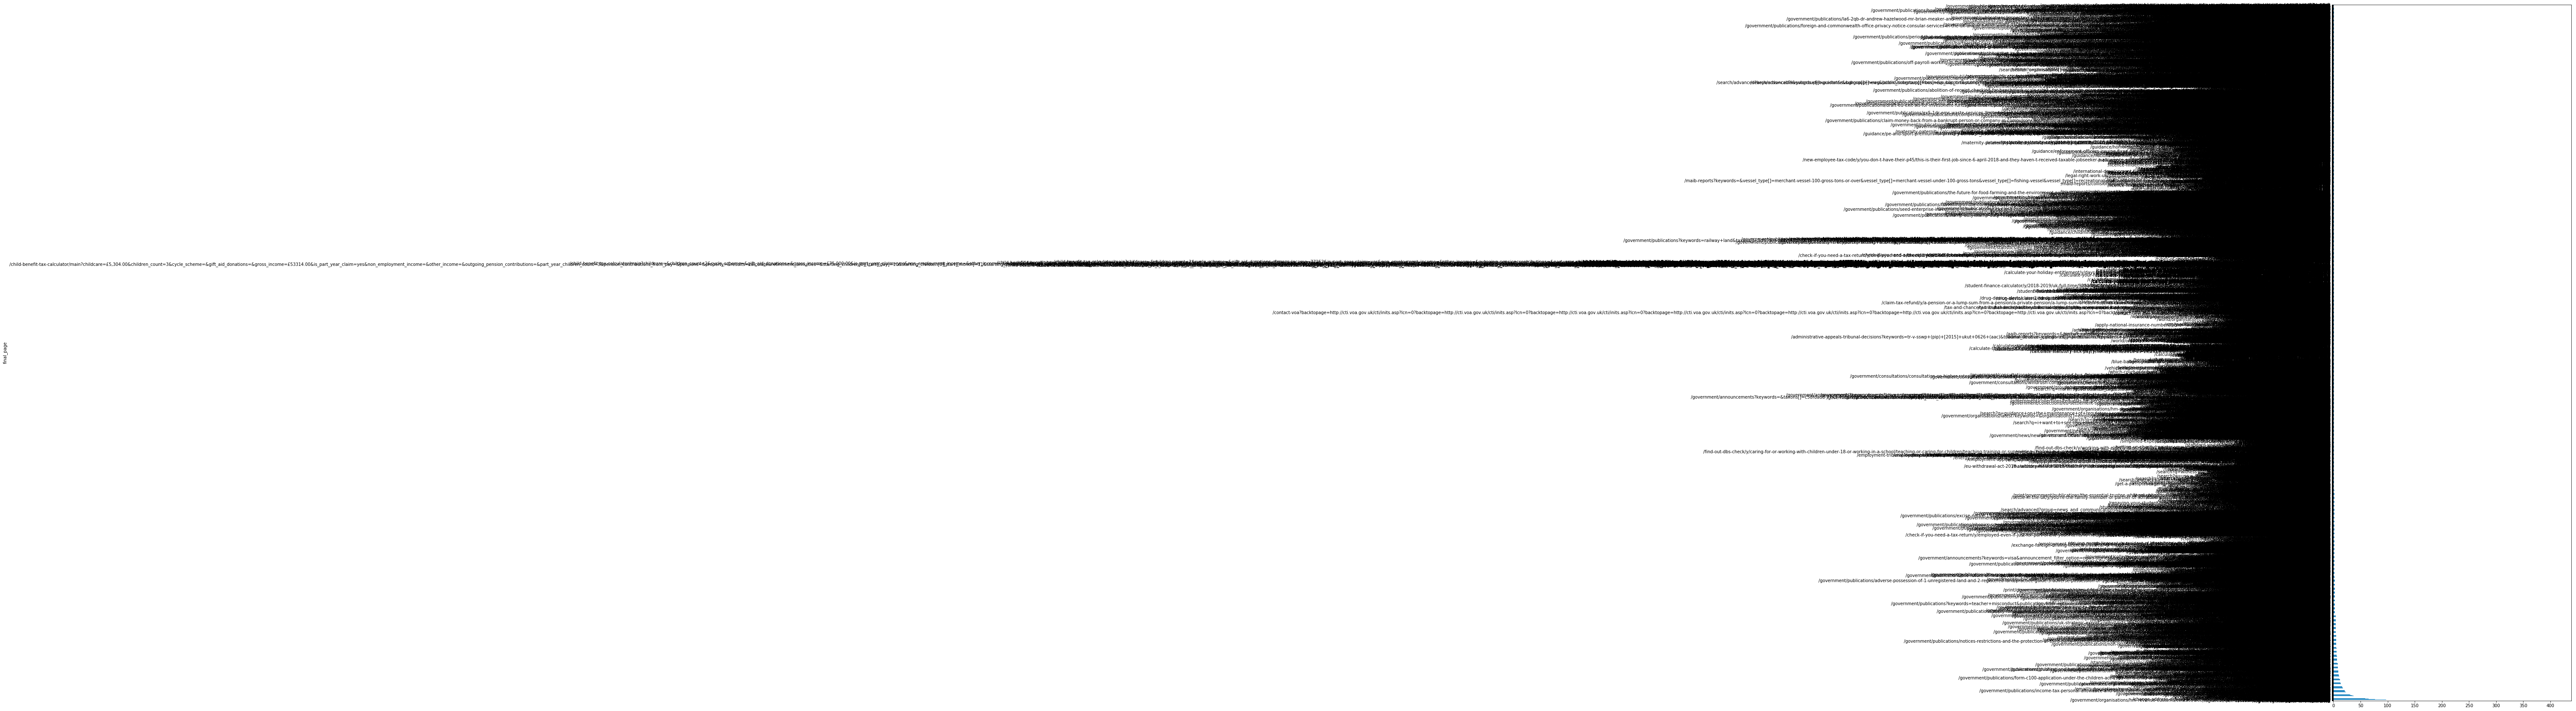

In [94]:
unique_page_sequences.groupby('final_page').size().sort_values(ascending=False)

In [95]:
journeys['final_page_type'] = 'other'
journeys.loc[journeys['final_page'].str.contains('/government/publications/', 'final_page_type')] = 'government_publication'
journeys.loc[journeys['final_page'].str.contains('log-in', 'final_page_type')] = 'login'
journeys.loc[journeys['final_page'].str.contains('sign-in', 'final_page_type')] = 'login'
journeys.loc[journeys['final_page'].str.contains('login', 'final_page_type')] = 'login'
journeys.loc[journeys['final_page'].str.contains('check', 'final_page_type')] = 'check'
journeys.loc[journeys['final_page'].str.contains('apply', 'final_page_type')] = 'apply'
journeys.loc[journeys['final_page'].str.contains('contact', 'final_page_type')] = 'contact/enquiries'
journeys.loc[journeys['final_page'].str.contains('enquiries', 'final_page_type')] = 'contact/enquiries'
journeys.loc[journeys['final_page'].str.contains(r'get-.*-information.*', 'final_page_type')] = 'get_information'
journeys.loc[journeys['final_page'].str.contains('send', 'final_page_type')] = 'send'
journeys.loc[journeys['final_page'].str.contains('find', 'final_page_type')] = 'find'
journeys.loc[journeys['final_page'].str.contains('calculat', 'final_page_type')] = 'calculate/calculator'
journeys.loc[journeys['final_page'].str.contains('order', 'final_page_type')] = 'order'
journeys.loc[journeys['final_page'].str.contains('manage', 'final_page_type')] = 'manage'
journeys.loc[journeys['final_page'].str.contains('update', 'final_page_type')] = 'update'
journeys.loc[journeys['final_page'].str.contains('eligibility', 'final_page_type')] = 'eligibility'
journeys.loc[journeys['final_page'].str.contains('estimate', 'final_page_type')] = 'estimate'
journeys.loc[journeys['final_page'].str.contains('renew', 'final_page_type')] = 'renew'
journeys.loc[journeys['final_page'].str.contains('pay', 'final_page_type')] = 'pay'
journeys.loc[journeys['final_page'].str.contains('claim', 'final_page_type')] = 'claim'
journeys.loc[journeys['final_page'].str.contains('change', 'final_page_type')] = 'change'

In [96]:
journeys.groupby('final_page_type').size()

final_page_type
apply                     2159 
calculate/calculator      1336 
change                    877  
check                     2078 
claim                     746  
contact/enquiries         1321 
eligibility               434  
estimate                  50   
find                      660  
get_information           160  
government_publication    5290 
login                     2319 
manage                    220  
order                     119  
other                     17810
pay                       1663 
renew                     235  
send                      268  
update                    144  
dtype: int64

In [97]:
def groupby_percent(df, groupby_var, unit_var, figsize=(10, 5)):
    x = df.groupby(groupby_var).count().reset_index()
    x['percent'] = 100*x[unit_var]/x[unit_var].sum()
    x = x.sort_values(['percent'])

    s = pd.DataFrame(x[[groupby_var, unit_var,'percent']])

    return(s, x.plot(x=groupby_var, y='percent', kind='barh', figsize=figsize, color='#2B8CC4'))

(           final_page_type  Page_Seq_NL    percent
 7   estimate                50           0.131964 
 13  order                   119          0.314075 
 18  update                  144          0.380058 
 9   get_information         160          0.422286 
 12  manage                  220          0.580643 
 16  renew                   235          0.620233 
 17  send                    268          0.707329 
 6   eligibility             434          1.145451 
 8   find                    660          1.741930 
 4   claim                   746          1.968909 
 2   change                  877          2.314656 
 5   contact/enquiries       1321         3.486500 
 1   calculate/calculator    1336         3.526089 
 15  pay                     1663         4.389137 
 3   check                   2078         5.484441 
 0   apply                   2159         5.698224 
 11  login                   2319         6.120510 
 10  government_publication  5290         13.961836
 14  other  

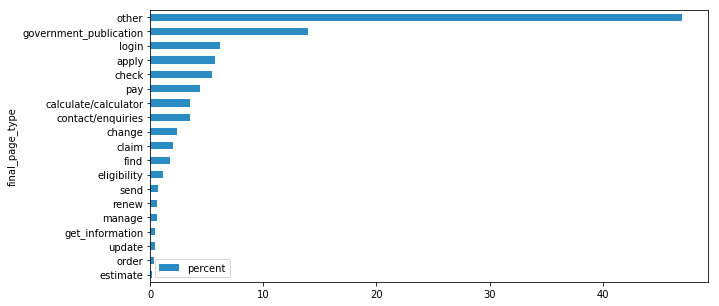

In [98]:
groupby_percent(journeys, 'final_page_type', 'Page_Seq_NL')

#### Final interaction with GOV.UK

In [99]:
def get_end_page_event(Page_Event_List):          
    return pd.eval(Page_Event_List)[-1][-1]

In [100]:
journeys['final_interaction'] = journeys['Page_Event_List'].map(get_end_page_event)

UndefinedVariableError: name 'government_publication' is not defined

In [ ]:
pd.set_option('display.max_colwidth', -1)
journeys[journeys.final_interaction.str.contains('start')]

In [ ]:
journeys['final_interaction_type'] = journeys.final_interaction.str.extract(r'<:<(.*)<:<', expand=False)

In [ ]:
journeys['final_external_link'] = journeys.final_interaction.str.extract(r'EVENT<:<External Link Clicked<:(.*)', expand=False)

In [ ]:
journeys['exit_to_assessed_service'] = np.where(journeys['final_external_link'].str.contains(r'.*service.gov.uk.*', na=False), 1, 0)

In [ ]:
journeys['exit_to_assessed_service'].value_counts(normalize=True)

In [ ]:
#make a smaller copy of data with only 2 cols ready to make it really looooong
slim = journeys[['Occurrences','exit_to_assessed_service']].copy()
#repeat rows for each occurrence
journey_expanded2 =  slim.loc[slim.index.repeat(slim['Occurrences'])]

In [ ]:
journey_expanded2['exit_to_assessed_service'].value_counts(normalize=True)

In [ ]:
plt.pie(journey_expanded2['exit_to_assessed_service'].value_counts(), labels=['did not exit to an assessed service', 'exited to an assessed service'], autopct='%1.1f%%')

In [ ]:
journeys['final_external_link_service'] = np.where(journeys.final_interaction.str.contains(r'<External Link Clicked<:(.*)', expand=False)

In [ ]:
groupby_percent(journeys, 'final_interaction_type', 'PageSequence', figsize=(5, 10))

In [ ]:
journeys.groupby('final_interaction_type').size().sort_values(ascending=False)

In [ ]:
print(journeys[journeys['final_interaction']=='PAGE<:<NULL<:<NULL'].shape)

print("{} out of {} ({}%) journeys ended in a page hit".format(journeys[journeys['final_interaction']=='PAGE<:<NULL<:<NULL'].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction']=='PAGE<:<NULL<:<NULL'].shape[0]/journeys.shape[0]*100))

In [ ]:
print(journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape)

print("{} out of {} ({}%) journeys ended in an external link clicked".format(journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape[0]/journeys.shape[0]*100))

In [ ]:
print(journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape)

print("{} out of {} ({}%) journeys ended in an specialist external link clicked".format(journeys[journeys['final_interaction'].str.startswith('EVENT<:<Specialist-external-link')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.startswith('EVENT<:<Specialist-external-link')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in aSpecialist-external-link".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Specialist-external-link')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Specialist-external-link')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in an download link clicked".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Download Link Clicked')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Download Link Clicked')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a  contents clicked".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<contentsClicked<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<contentsClicked<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a breadcrumbClicked".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<breadcrumbClicked<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<breadcrumbClicked<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a JavaScript Error".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<JavaScript Error<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<JavaScript Error<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a Simple Smart Answer".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Simple Smart Answer<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Simple Smart Answer<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a Smart Answer".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Smart Answer<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Smart Answer<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a social media".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<social media<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<social media<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in yesNoFeedbackForm".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<yesNoFeedbackForm<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<yesNoFeedbackForm<')].shape[0]/journeys.shape[0]*100))